# Exploring the Relationship Between Suicide Rates and Global Happiness: A Multi-Dimensional Analysis
## 多维分析自杀率与全球幸福感之间的关系

本报告结合使用了Python,R, Tableau来完成数据可视化，下述属于使用Python的部分，主要完成了多指标相关性分析与雷达图展示。

## Part II: Correlated Variables Visualization

Create Merged CSV: After visualizing the basic situation of global suicide rate, a merged CSV file
(HappySuicide_num.csv) is created to analyze the potential variables correlated with the suicide rate. Besides, since a country has different suicide rates for different age groups and different genders, calculate the average suicide rate for each country using the ‘groupby’ function is also needed, and finally
add the column of the average suicide rate to the merged csv. Furthermore, all the strings in the HappySuicide_num.csv table were converted into numeric form. For
instance, "male" was replaced with 0, "female" with 1, and each age group was substituted with its
median age. For example, "35-55 years old" was replaced by 45 years old. Subsequently, based on the
modified table, the following visualization tasks were performed.

In [22]:
import pandas as pd

#读取CSV文件
df = pd.read_csv('HappySuicide_num.csv')

#计算每个国家的平均自杀率
avg_suicide_rate_100k = df.groupby('country')['suicides.100k.pop'].mean()

#将平均自杀率添加到数据框中的新列
df['avg_suicide_rate_100k'] = df['country'].map(avg_suicide_rate)

#保存修改后的数据框回CSV文件
df.to_csv('HappySuicide_num.csv', index=False)

Garph 7：2015年自杀率与各种指数之间的相关性

A total of eight indicators measuring the happiness of a country were analyzed. Using Python, the
correlation between these indicators and the average suicide rate was visualized. The findings revealed
that Freedom, Trust in Government, Generosity, and Dystopia residual exhibited a negative correlation
with the average suicide rate, while the remaining indicators displayed a positive correlation.

我用Python可视化分析了八个衡量国家幸福程度的指标与自杀率之间的相关性。研究结果显示，自由度、对政府的信任度、慷慨度和不平等残差与平均自杀率呈负相关，而其余指标则呈正相关。

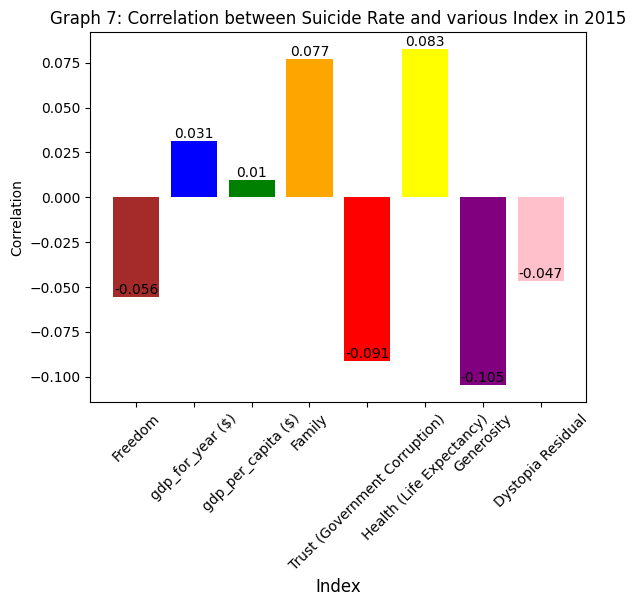

In [2]:
#图 7：2015年自杀率与各种指数之间的相关性

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

s_data = pd.read_csv('master.csv')
h_data = pd.read_csv('2015happy-Copy1.csv')


merged_data = pd.merge(s_data, h_data, on=['country','year'])

merged_data.to_csv('merged_data.csv',index=False)

merged_data3=pd.read_csv('merged_data.csv', dtype={'suicides/100k pop': float}, thousands=',')
suicide_rate = pd.to_numeric(merged_data3['suicides/100k pop'], errors='coerce')

variables = [ 'Freedom','gdp_for_year ($)','gdp_per_capita ($)','Family', 'Trust (Government Corruption)',  'Health (Life Expectancy)','Generosity','Dystopia Residual']

correlations = {}
for column in variables:
    correlation = merged_data3[column].corr(suicide_rate)
    correlations[column] = correlation
colors = ['brown','blue', 'green', 'orange', 'red','Yellow','purple','pink']

plt.bar(correlations.keys(), correlations.values(), color=colors)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Correlation')
plt.title('Graph 7: Correlation between Suicide Rate and various Index in 2015')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
for i, val in enumerate(correlations.values()):
    plt.text(i, val, round(val, 3), ha='center', va='bottom')
plt.show()

Graph 8&9: Radar Graph of happiness indicators for countries with top 3 and bottom 3 suicide rates

为了研究自杀率最高和最低国家之间幸福指数的差异，我采用雷达图进行分析。
从图8可以看出，自杀率与国内生产总值之间存在较强相关性，说明国家的繁荣程度对自杀率有缓解作用。然而，过度关注经济增长可能忽视政治、文化和社会发展。因此，推动经济增长的同时，需维护政府权威，增强公众信任。

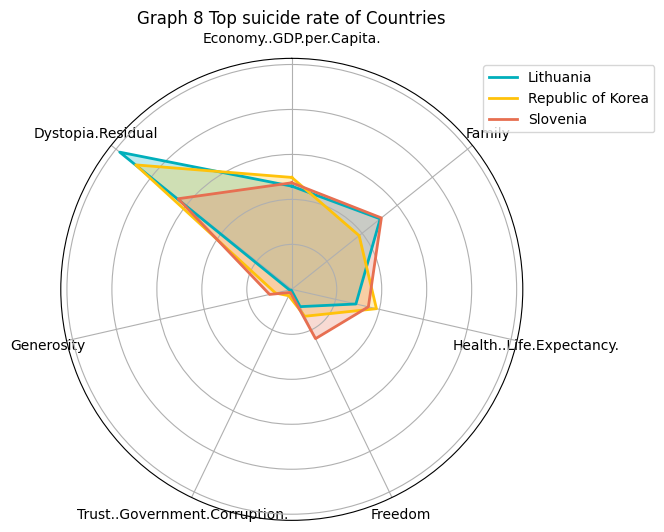

In [3]:
#图8 三大自杀率最高的国家

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('top_data.csv')
countries = data['country']
columns = data.columns[1:]

#颜色
colors = ['#00AFBB', '#FFC20A', '#E76F51']

#雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

#计算角度
angles = np.linspace(0, 2 * np.pi, len(columns), endpoint=False).tolist()
angles += angles[:1]

#绘制每个国家的雷达图
for i, country in enumerate(countries):
    values = data.loc[i, columns].values.tolist()
    values += values[:1]

    ax.plot(angles, values, color=colors[i], linewidth=2, label=country)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

#雷达图标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)
ax.set_yticklabels([])

#添加图例
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#设置标题
ax.set_title('Graph 8 Top suicide rate of Countries')

plt.show()

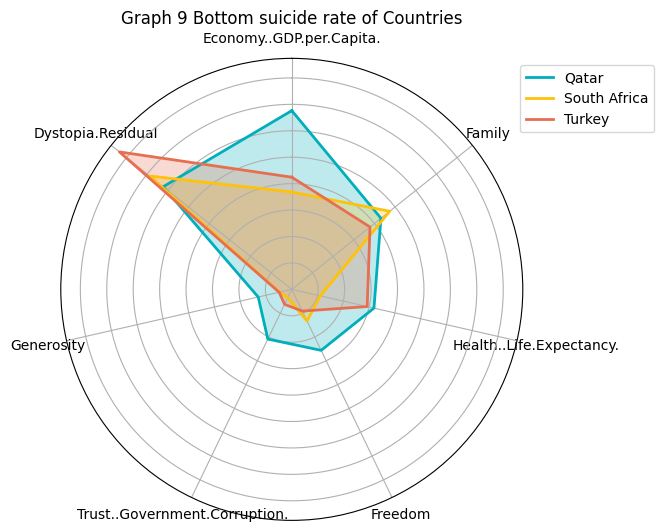

In [11]:
#图9 三大自杀率最低的国家

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('bottom_data.csv')
countries = data['country']
columns = data.columns[1:]

# 创建颜色列表
colors = ['#00AFBB', '#FFC20A', '#E76F51']

# 绘制雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 计算角度
angles = np.linspace(0, 2 * np.pi, len(columns), endpoint=False).tolist()
angles += angles[:1]

# 绘制每个国家的雷达图
for i, country in enumerate(countries):
    values = data.loc[i, columns].values.tolist()
    values += values[:1]

    ax.plot(angles, values, color=colors[i], linewidth=2, label=country)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

#雷达图标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)
ax.set_yticklabels([])

#添加图例
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#标题
ax.set_title('Graph 9 Bottom suicide rate of Countries')

plt.show()

Graph 10 & 11

这两张图用于比较和分析自杀率最低的国家和自杀率最高的国家之间每个变量的平均指数。分析结果显示，“信任政府 ”和 “信任家庭 ”是特别值得关注的变量。

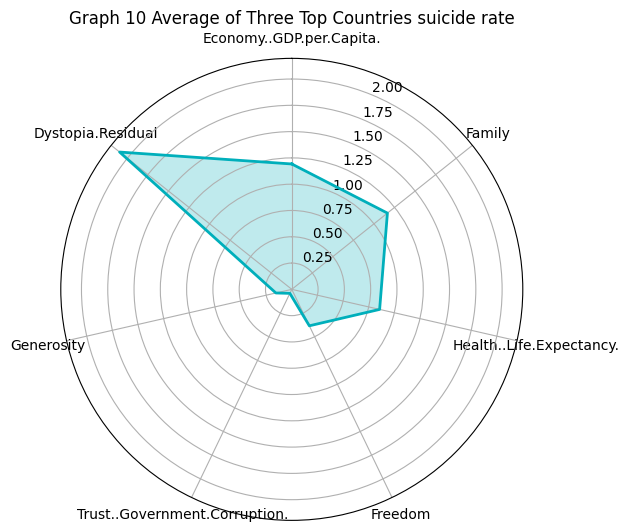

In [10]:
#图10 三个自杀率最高国家的7大维度平均值
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('top10_data.csv')
columns = data.columns[1:]

#计算每个维度的平均值
average_values = data[columns].mean()

#创建颜色列表
color = '#00AFBB'

#绘制雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

#计算角度
num_vars = len(columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

#调整平均值数据的维度
average_values = np.concatenate((average_values, [average_values[0]]))

#雷达图
ax.plot(angles, average_values, color=color, linewidth=2)
ax.fill(angles, average_values, color=color, alpha=0.25)

#雷达图标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)
ax.set_title('Graph 10 Average of Three Top Countries suicide rate')

plt.show()

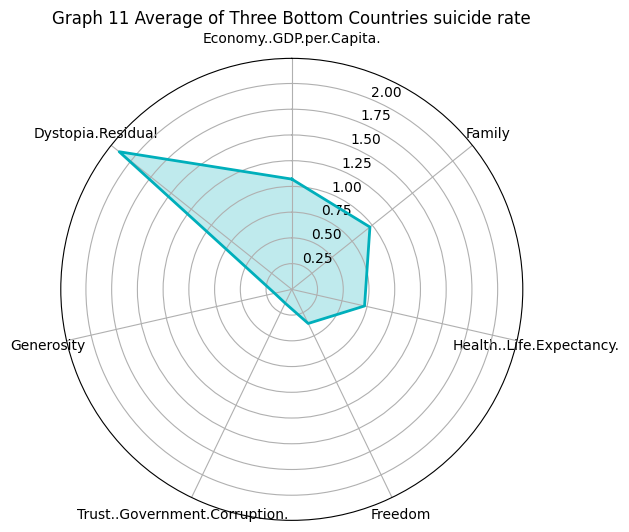

In [6]:
#图11 三个自杀率最低国家的7大维度平均值
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('bottom10_data.csv')
columns = data.columns[1:]

#计算每个维度的平均值
average_values = data[columns].mean()

#创建颜色列表
color = '#00AFBB'

#generate雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

#计算角度
num_vars = len(columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

#调整平均值数据的维度
average_values = np.concatenate((average_values, [average_values[0]]))

#generate雷达图
ax.plot(angles, average_values, color=color, linewidth=2)
ax.fill(angles, average_values, color=color, alpha=0.25)

#雷达图标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)
ax.set_title('Graph 11 Average of Three Bottom Countries suicide rate')

plt.show()

# Part III: Visualization of Korea
From Graph 15(analysed by Tableau), the suicide rate in Korea is climbing along with the GDP per capita, for which it can be hypothesized that the fast-growing economic situation may have brought some life and psychological pressure to the Korean people.

从图15（通过 Tableau 分析）可以看出，韩国的自杀率随着人均 GDP 的上升而攀升，由此可以推测，快速增长的经济形势可能给韩国人带来了一定的生活和心理压力。

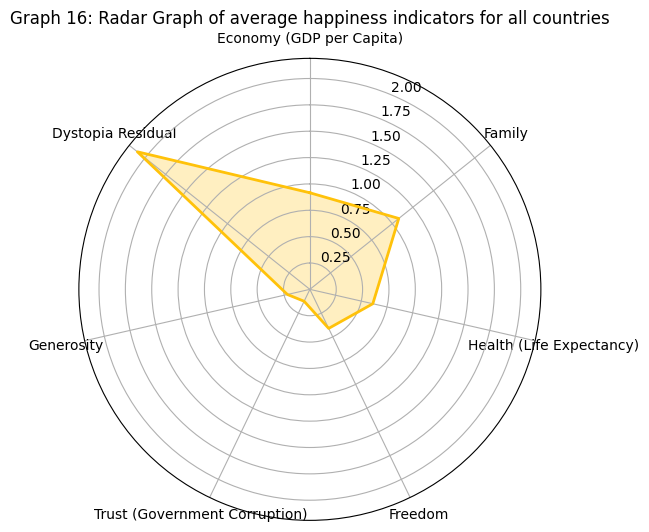

In [7]:
#图 16：所有国家平均幸福指数雷达图

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#读取数据
data = pd.read_csv('2015-2019.csv')
columns = data.columns[5:]

#每个维度的平均值
average_values = data[columns].mean()

#创建颜色列表
color = '#FFC20A'

#绘制雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

#计算角度
num_vars = len(columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

#调整平均值数据的维度
average_values = np.concatenate((average_values, [average_values[0]]))

#绘制雷达图
ax.plot(angles, average_values, color=color, linewidth=2)
ax.fill(angles, average_values, color=color, alpha=0.25)

#雷达图标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)

#标题
ax.set_title('Graph 16: Radar Graph of average happiness indicators for all countries')

plt.show()

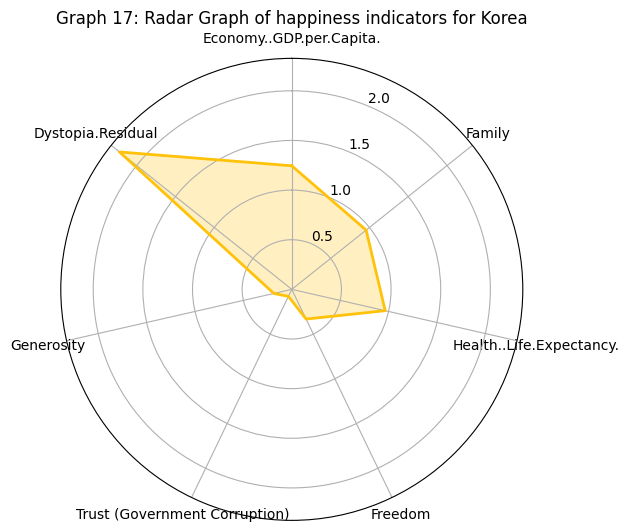

In [9]:
#图 17：韩国幸福指数雷达图

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('korea_data.csv')
columns = data.columns[1:]

# 计算每个维度的平均值
average_values = data[columns].mean()

# 创建颜色列表
color = '#FFC20A'

# 绘制雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 计算角度
num_vars = len(columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 调整平均值数据的维度
average_values = np.concatenate((average_values, [average_values[0]]))

# 绘制雷达图
ax.plot(angles, average_values, color=color, linewidth=2)
ax.fill(angles, average_values, color=color, alpha=0.25)

# 设置雷达图的标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)

# 添加标题
ax.set_title('Graph 17: Radar Graph of happiness indicators for Korea')

# 显示图形
plt.show()

Since the larger the amount of data, the smaller the error. Thus, for graph 16, a merged data CSV (2015- 2019.csv) of the World Happiness Index for a total of 6 years from 2015-2019 is created. To see if Korea is lacking in political, economic, social and cultural aspects compared to the world average. The figure finds that Korea's trust in government and family harmony are relatively below average.